# Лабораторная работа №3: Исследование алгоритмов классификации
### Цель работы 
Изучение и сравнение алгоритмов классификации k-ближайших соседей (kNN) и дерева решений на примере датасета.

#### В данной работе будут исследованы алгоритмы классификации, такие как:
- kNN (k-ближайших соседей)
- Дерево решений

#### Задача заключается в том, чтобы оценить и сравнить результаты этих алгоритмов на реальных данных с использованием различных метрик, таких как:
- Точность (Accuracy)
- Precision, Recall, F1-мера
- ROC-кривая

#### Целевая переменная - это кластеры (Cluster), которые мы будем классифицировать.


### 1. Загрузка

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_curve, auc
from sklearn.metrics import roc_auc_score, classification_report, confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

data = pd.read_csv('AI_index_db.csv')

data.head()

,Country,Talent,Infrastructure,Operating Environment,Research,Development,Government Strategy,Commercial,Total score,Region,Cluster,Income group,Political regime
0,United States of America,100.00,94.02,64.56,100.00,100.00,77.39,100.00,100.00,Americas,Power players,High,Liberal democracy
1,China,16.51,100.00,91.57,71.42,79.97,94.87,44.02,62.92,Asia-Pacific,Power players,Upper middle,Closed autocracy
2,United Kingdom,39.65,71.43,74.65,36.50,25.03,82.82,18.91,40.93,Europe,Traditional champions,High,Liberal democracy
3,Canada,31.28,77.05,93.94,30.67,25.78,100.00,14.88,40.19,Americas,Traditional champions,High,Liberal democracy
4,Israel,35.76,67.58,82.44,32.63,27.96,43.91,27.33,39.89,Middle East,Rising stars,High,Liberal democracy


### 2. Разделение данных на обучающую и тестовую выборки

In [11]:
X = data[['Research', 'Talent', 'Development', 'Infrastructure', 'Operating Environment', 'Government Strategy', 'Commercial']]
y = data['Cluster']  

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

### 3. Обучение моделей

In [16]:
# Модель k-ближайших соседей (kNN)
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_scaled, y_train)

y_pred_knn = knn.predict(X_test_scaled)

In [17]:
# Модель дерева решений
tree = DecisionTreeClassifier(random_state=42)
tree.fit(X_train, y_train)

y_pred_tree = tree.predict(X_test)

### 4. Оценка качества моделей

In [19]:
# Метрики оценки качества для kNN
print("kNN Classifier Results:")
print("Accuracy:", accuracy_score(y_test, y_pred_knn))
print("Precision:", precision_score(y_test, y_pred_knn, average='macro', zero_division=1))
print("Recall:", recall_score(y_test, y_pred_knn, average='macro', zero_division=1))
print("F1-score:", f1_score(y_test, y_pred_knn, average='macro', zero_division=1))

kNN Classifier Results:
Accuracy: 0.631578947368421
Precision: 0.8357142857142857
Recall: 0.32999999999999996
F1-score: 0.27272727272727276


In [20]:
# Метрики оценки качества для дерева решений
print("\nDecision Tree Classifier Results:")
print("Accuracy:", accuracy_score(y_test, y_pred_tree))
print("Precision:", precision_score(y_test, y_pred_tree, average='macro', zero_division=1))
print("Recall:", recall_score(y_test, y_pred_tree, average='macro', zero_division=1))
print("F1-score:", f1_score(y_test, y_pred_tree, average='macro', zero_division=1))


Decision Tree Classifier Results:
Accuracy: 0.5263157894736842
Precision: 0.4888888888888888
Recall: 0.54
F1-score: 0.5073684210526316


### 5. Визуализация матрицы ошибок

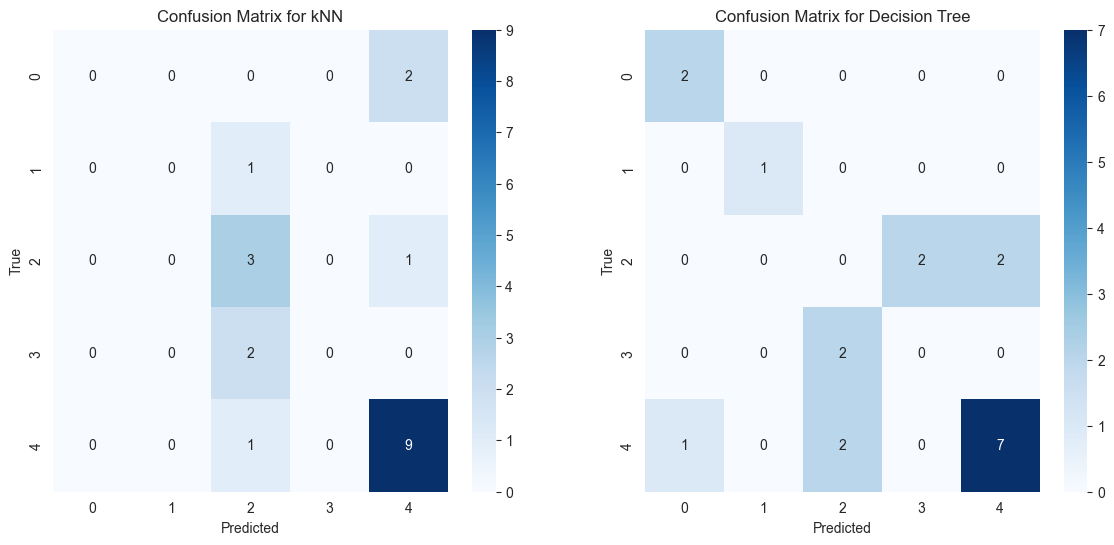

In [21]:
conf_matrix_knn = confusion_matrix(y_test, y_pred_knn)
conf_matrix_tree = confusion_matrix(y_test, y_pred_tree)

fig, ax = plt.subplots(1, 2, figsize=(14, 6))

sns.heatmap(conf_matrix_knn, annot=True, fmt="d", cmap="Blues", ax=ax[0])
ax[0].set_title('Confusion Matrix for kNN')
ax[0].set_xlabel('Predicted')
ax[0].set_ylabel('True')

sns.heatmap(conf_matrix_tree, annot=True, fmt="d", cmap="Blues", ax=ax[1])
ax[1].set_title('Confusion Matrix for Decision Tree')
ax[1].set_xlabel('Predicted')
ax[1].set_ylabel('True')

plt.show()


### 6. ROC-AUC для дерева решений

In [22]:
roc_auc_tree = roc_auc_score(y_test, tree.predict_proba(X_test), multi_class='ovr')
print("\nROC AUC for Decision Tree:", roc_auc_tree)


ROC AUC for Decision Tree: 0.7034640522875817
